In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input,Conv2D, Flatten, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

In [3]:
path = 'D:\DL Projects\GTSRB - German Traffic Sign Recognition'
train_path = 'D:\DL Projects\GTSRB - German Traffic Sign Recognition\Train'

In [4]:
data = []
labels = []
classes = len(os.listdir(train_path))

for i in range(classes):
    img_path = os.path.join(train_path,str(i))
    for img in os.listdir(img_path):
        im = Image.open(img_path + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)

data = np.array(data)
labels = np.array(labels)


In [5]:
print(data.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


D:\DL Projects\GTSRB - German Traffic Sign Recognition\Train\42


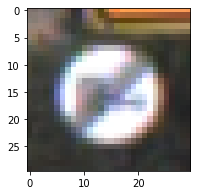

In [6]:
#Exploring sample Image

print(img_path)
img = Image.open(img_path + '/' + '00042_00000_00000.png')
img = img.resize((30, 30))
sr = np.array(img) 
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.show()

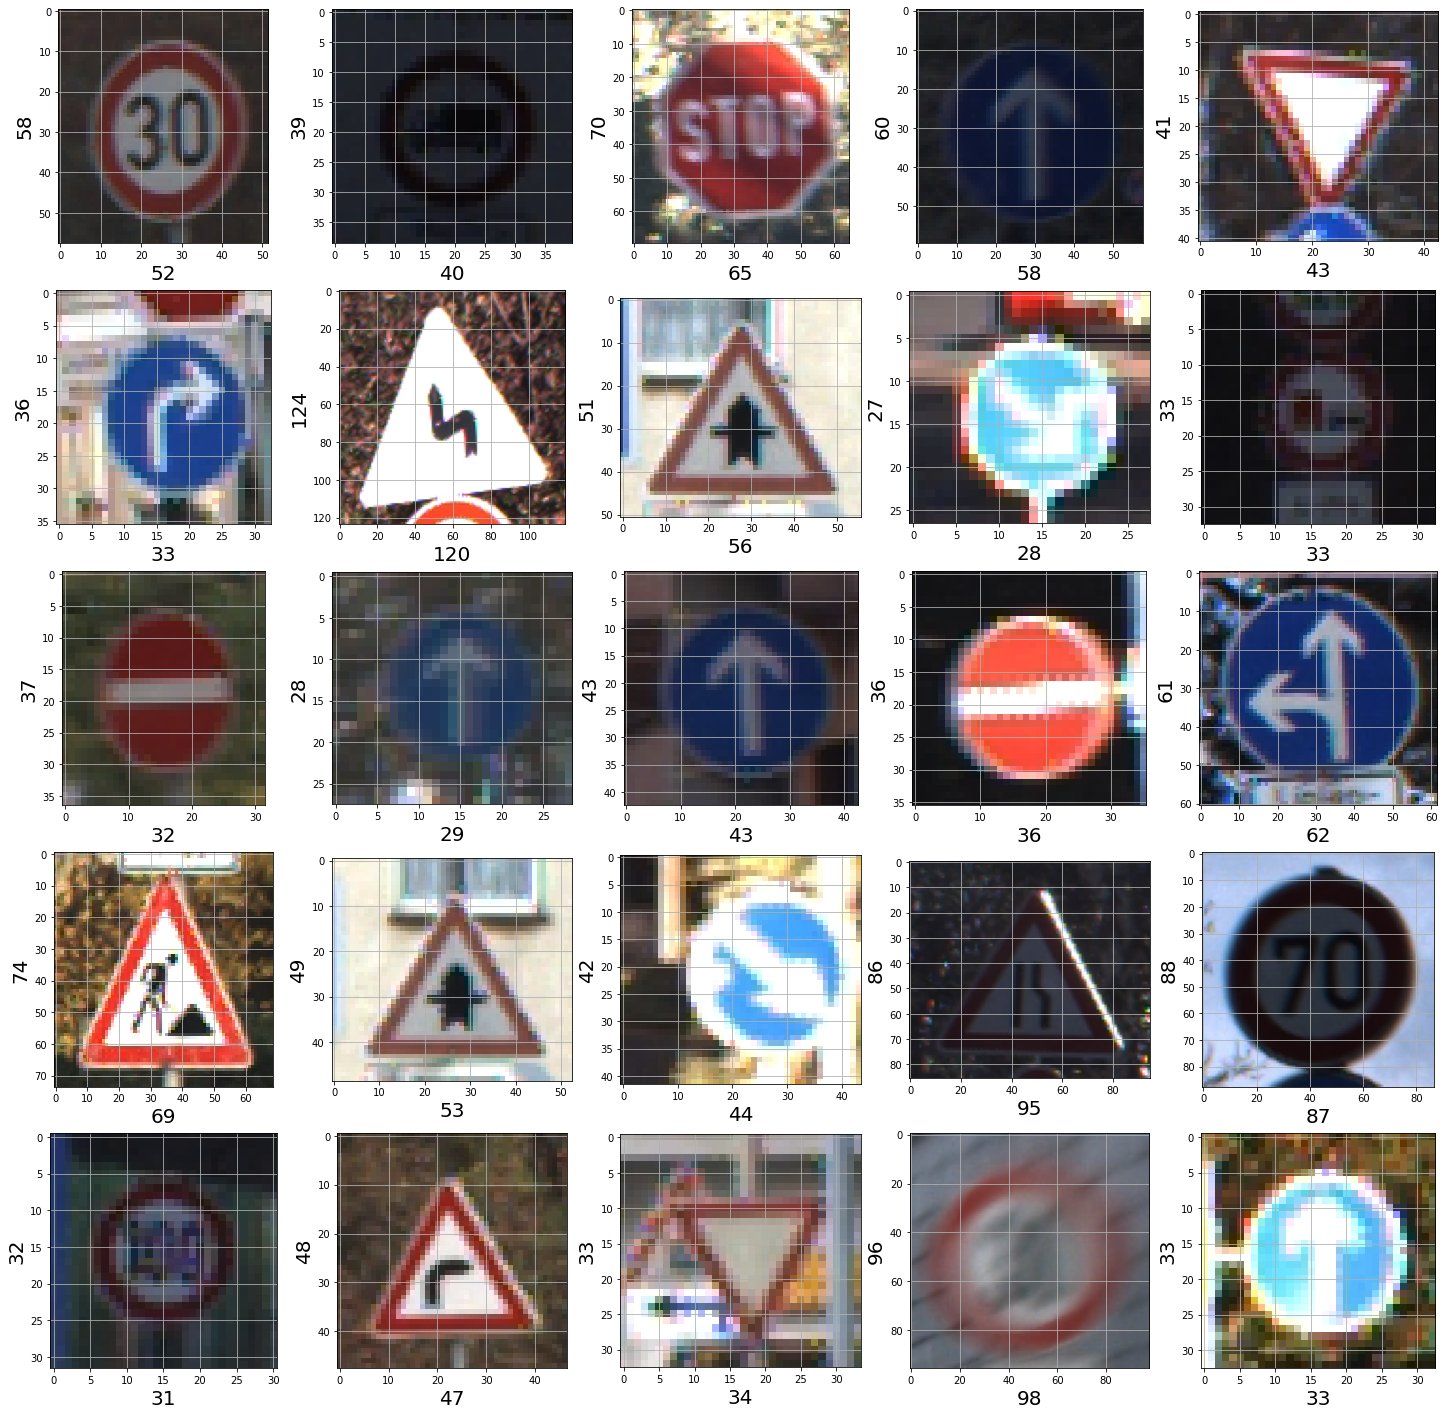

In [7]:
# Visualizing 25 random images from test data

import random
from matplotlib.image import imread

test = pd.read_csv(path + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = path + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [8]:
#Splitting test & train data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state =42)
print('Train Shape: ',x_train.shape, y_train.shape)
print('Test Shape: ', x_test.shape, y_test.shape)

Train Shape:  (31367, 30, 30, 3) (31367,)
Test Shape:  (7842, 30, 30, 3) (7842,)


In [9]:
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)
print(y_train.dtype, y_test.dtype)

float32 float32


In [10]:
x_train[0].shape

(30, 30, 3)

In [11]:
#Model building

i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides=2, activation="relu")(x)
x = Conv2D(128, (3,3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(classes, activation="softmax")(x)
model = Model(i, x)

In [12]:
#compiling model

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
981/981 [==============================] - 10s 7ms/step - loss: 1.3942 - accuracy: 0.6539 - val_loss: 0.3901 - val_accuracy: 0.9053
Epoch 2/15
981/981 [==============================] - 7s 7ms/step - loss: 0.5505 - accuracy: 0.8502 - val_loss: 0.2515 - val_accuracy: 0.9355
Epoch 3/15
981/981 [==============================] - 7s 7ms/step - loss: 0.4149 - accuracy: 0.8875 - val_loss: 0.2168 - val_accuracy: 0.9425
Epoch 4/15
981/981 [==============================] - 7s 7ms/step - loss: 0.3303 - accuracy: 0.9104 - val_loss: 0.1778 - val_accuracy: 0.9574
Epoch 5/15
981/981 [==============================] - 7s 7ms/step - loss: 0.2994 - accuracy: 0.9194 - val_loss: 0.1328 - val_accuracy: 0.9651
Epoch 6/15
981/981 [==============================] - 7s 7ms/step - loss: 0.2805 - accuracy: 0.9241 - val_loss: 0.1319 - val_accuracy: 0.9671
Epoch 7/15
981/981 [==============================] - 7s 7ms/step - loss: 0.2565 - accuracy: 0.9330 - val_loss: 0.1319 - val_accuracy: 0.9649
Epoch

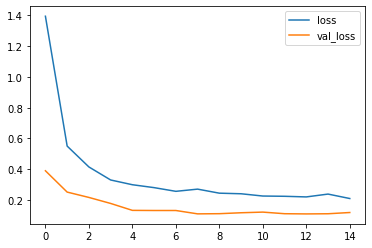

In [14]:
# Plot loss per iteration

plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

test = pd.read_csv("D:\DL Projects\GTSRB - German Traffic Sign Recognition\Test.csv")
labels = test['ClassId'].values
test_imgs = test['Path'].values

data = []
#test_labels = []
for img in test_imgs:
    im = Image.open(path + '/' + img)
    im = im.resize((30,30))
    data.append(np.array(im))

test_data = np.array(data)
predictions = np.argmax(model.predict(test_data),axis=-1) 

print("accuracy: ", accuracy_score(labels, predictions))

395/395 [==============================] - 3s 2ms/step
accuracy:  0.9229612034837688


In [19]:
from sklearn.metrics import classification_report

print(classification_report(labels, predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91        60
           1       0.88      0.95      0.91       720
           2       0.96      0.93      0.94       750
           3       0.96      0.93      0.94       450
           4       0.95      0.93      0.94       660
           5       0.87      0.94      0.90       630
           6       0.94      0.83      0.88       150
           7       0.96      0.87      0.91       450
           8       0.83      0.93      0.88       450
           9       0.96      1.00      0.98       480
          10       0.99      0.97      0.98       660
          11       0.89      0.90      0.90       420
          12       0.97      0.92      0.95       690
          13       0.97      0.99      0.98       720
          14       0.99      1.00      0.99       270
          15       0.84      0.98      0.90       210
          16       0.99      0.98      0.98       150
          17       1.00    

# RESULTS:

Finally the model performs good with 92% accuracy

F1-score is also pretty good for all the classes

The training & Validation loss is almost constant after certain epochs